In [144]:
# load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

In [ ]:
# load dataset
df_new = pd.read_csv('diabetes.xls')

In [146]:
# Copying the Data Frame
df = df_new.copy()

I copy DataFrames to create an independent duplicate of the original data, allowing for modifications and analyses without affecting the initial dataset and maintaining its integrity.

In [147]:
# Total Number of Rows and Columns
print("Total Number of Rows",df.shape[0])
print("Total Number of Columns",df.shape[1])

Total Number of Rows 768
Total Number of Columns 9


In [148]:
# first 5 records
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [149]:
# last 5 records
df.tail()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [150]:
# Rename the Column Names
df.rename(columns={
    'Unnamed: 0': 'Pregnancies',
    'Pregnancies': 'Glucose',
    'Glucose': 'BloodPressure',
    'BloodPressure': 'SkinThickness',
    'SkinThickness': 'Insulin',
    'Insulin': 'BMI',
    'BMI': 'DiabetesPedigreeFunction',
    'DiabetesPedigreeFunction': 'Age'
}, inplace=True)

when you read the CSV, the index column (Unnamed: 0) was mistakenly treated as a data column.

renamed because columns were shifted:

Unnamed: 0 actually contains the Pregnancies values.

Pregnancies actually contains the Glucose values.

Glucose contains BloodPressure values.

BloodPressure contains SkinThickness values.

SkinThickness contains Insulin values.

Insulin contains BMI values.

BMI contains DiabetesPedigreeFunction values.

DiabetesPedigreeFunction contains Age values.

Outcome is already correct.

In [151]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [153]:
# Stastical Summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [154]:
# Column Names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [155]:
# check null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Whole Dataset we haven't Null Values

In [156]:
# Check Duplicated Records
df.duplicated().sum()

np.int64(0)

In Our Dataset We don't have any Duplicated Records

In [157]:
for col in df.columns:
    print(df[col].value_counts().sort_values(ascending=False))
    print(" ")
    print("------------------------")
    print(" ")

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64
 
------------------------
 
Glucose
99     17
100    17
111    14
125    14
129    14
       ..
56      1
169     1
149     1
65      1
190     1
Name: count, Length: 136, dtype: int64
 
------------------------
 
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
54     11
52     11
92      8
75      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
100     3
98      3
30      2
46      2
55      2
104     2
108     2
40      1
122     1
95      1
102     1
61      1
24      1
38      1
114     1
Name: count, dtype: int64
 
------------------------
 
SkinThickness
0     227
32     31
30  

- Total 111 Values are 0 in Pregnancies
- Total 35 Values are 0 in BloodPressure
- Total 227 Values are 0 in SkinThickness
- Total 374 Values are 0 in Insulin

In the Human Body, BloodPressure, SkinThickness, and Insulin can't be 0, so 0 Replace with Null, and after Null Values are Replaced with median

In [158]:
# Replace 0's with Null

df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)   # also impossible to be 0
df['BMI'] = df['BMI'].replace(0, np.nan)           # BMI can’t be 0

In [159]:
# 0 Replaced with Median
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)

Why median is preferred here?

These medical variables are not normally distributed (long tail, outliers).

The median is robust and won’t be pulled by extreme values (e.g., very high insulin).

In [160]:
# Check Corelation with each Columns
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.217870,0.182037,0.409283,0.218487,0.137337,0.263514,0.466581
BloodPressure,0.208615,0.217870,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.182037,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.409283,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.218487,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


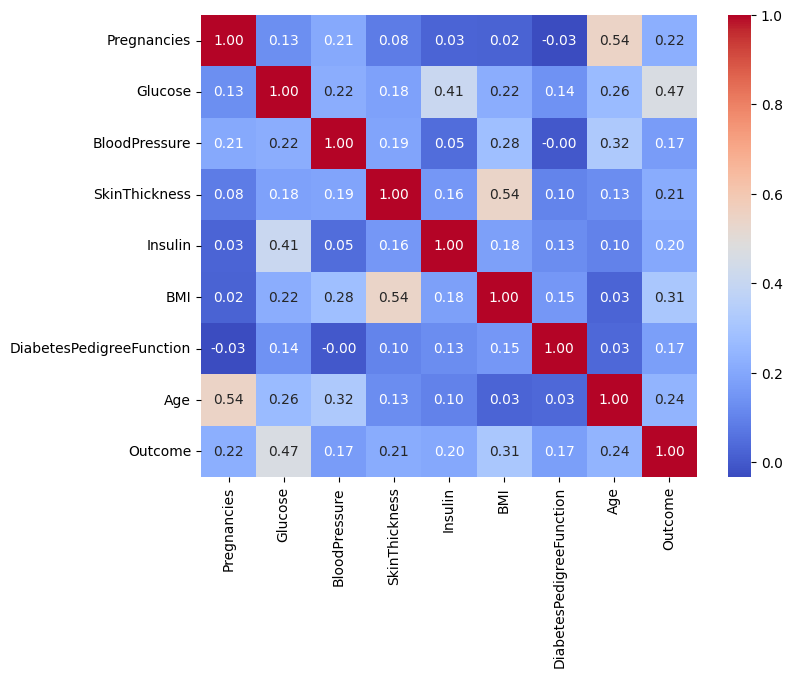

In [161]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Key Observations from the Correlation Table

Strongest correlations with Outcome (diabetes presence = 1, absence = 0):

Glucose has the highest link with diabetes (0.47)

Insulin (0.20) and family history (0.17) also show a noticeable connection to diabetes.

BMI (0.31) has a Moderate positive relation → higher body weight, slightly higher diabetes risk.

Other features like glucose, BP, and skin thickness show very weak or no strong link with diabetes.

No two features are strongly related (>0.7), so no serious multicollinearity problem.

*In short: Pregnancies, Insulin, Family History, and BMI matter the most for predicting diabetes in this data.*

In this case, no serious issue because all correlations are moderate or weak (<0.7).

### Visulization

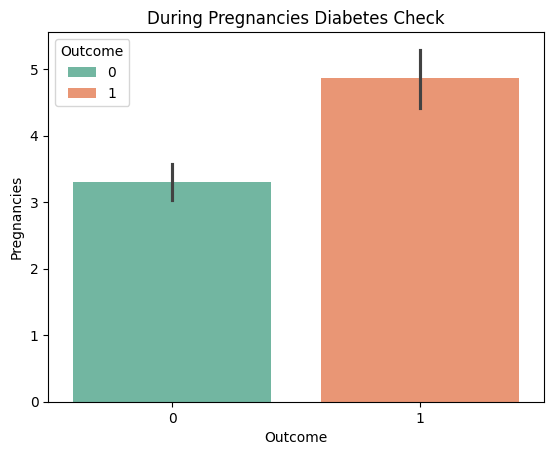

In [162]:
sns.barplot(x=df['Outcome'], y=df['Pregnancies'], hue=df['Outcome'], palette="Set2")
plt.title("During Pregnancies Diabetes Check")
plt.show()

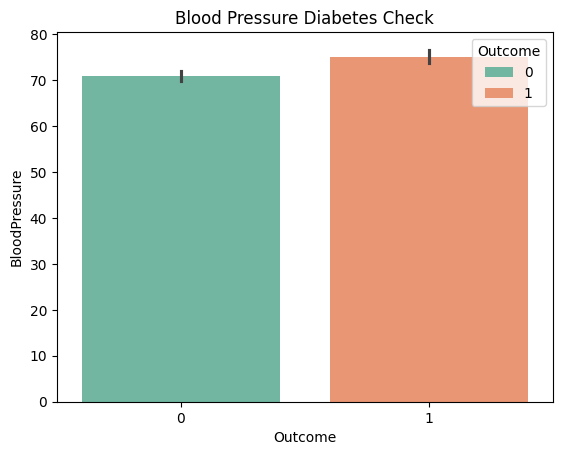

In [163]:
sns.barplot(x=df['Outcome'], y=df['BloodPressure'], hue=df['Outcome'], palette="Set2")
plt.title("Blood Pressure Diabetes Check")
plt.show()

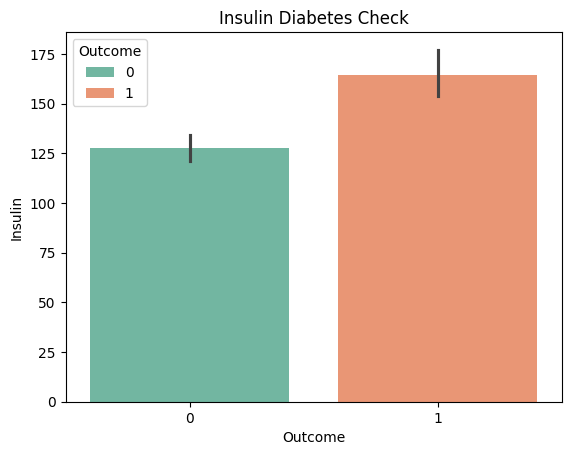

In [164]:
sns.barplot(x=df['Outcome'], y=df['Insulin'], hue=df['Outcome'], palette="Set2")
plt.title("Insulin Diabetes Check")
plt.show()

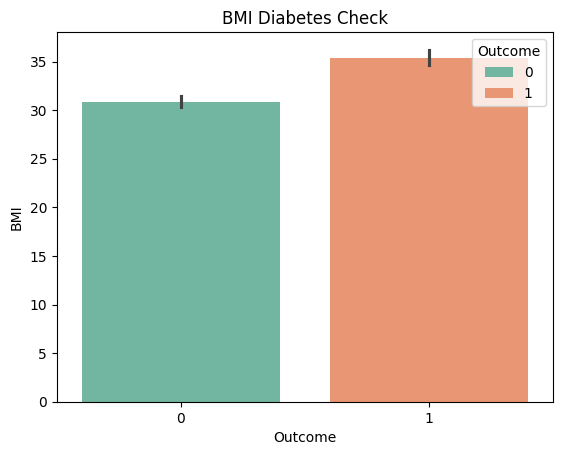

In [165]:
sns.barplot(x=df['Outcome'], y=df['BMI'], hue=df['Outcome'], palette="Set2")
plt.title("BMI Diabetes Check")
plt.show()

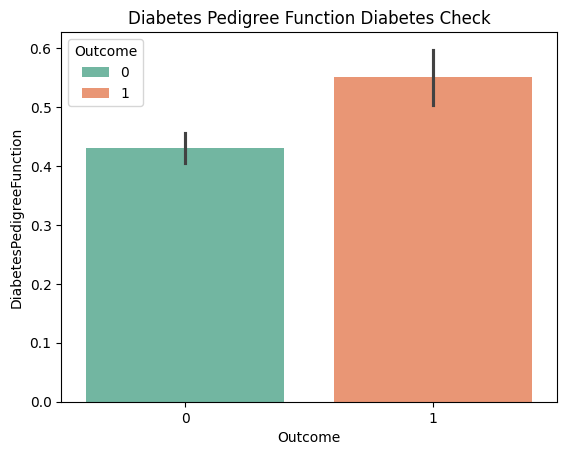

In [166]:
sns.barplot(x=df['Outcome'], y=df['DiabetesPedigreeFunction'], hue=df['Outcome'], palette="Set2")
plt.title("Diabetes Pedigree Function Diabetes Check")
plt.show()

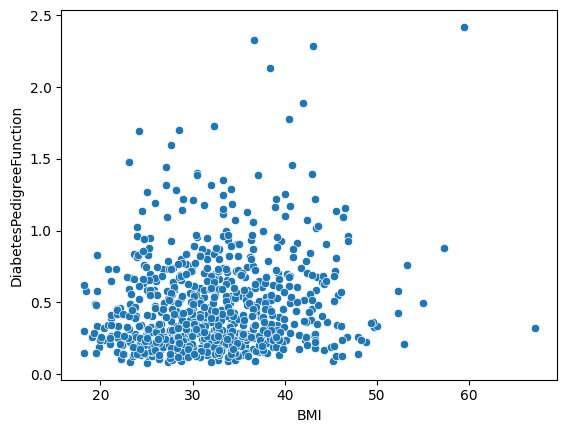

In [167]:
sns.scatterplot(y=df['DiabetesPedigreeFunction'], x=df['BMI'])
plt.show()

In [168]:
# check distribution of All Columns
plt.figure(figsize=(5,3))
def distribution_column(col):
    sns.histplot(df[col], bins=12, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

<Figure size 500x300 with 0 Axes>

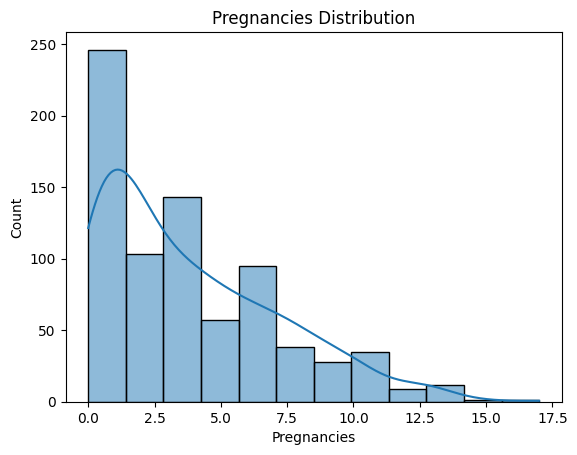

In [169]:
distribution_column('Pregnancies')

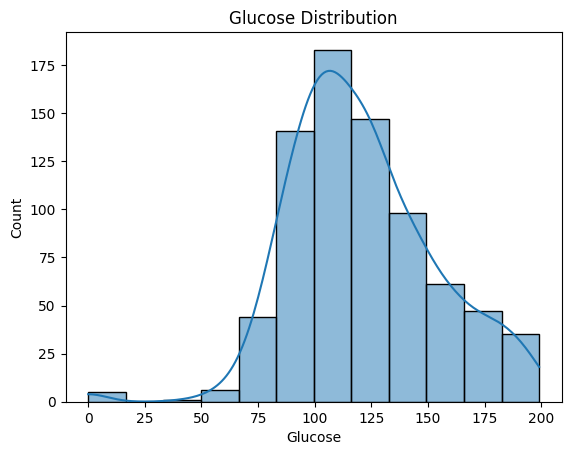

In [170]:
distribution_column('Glucose')

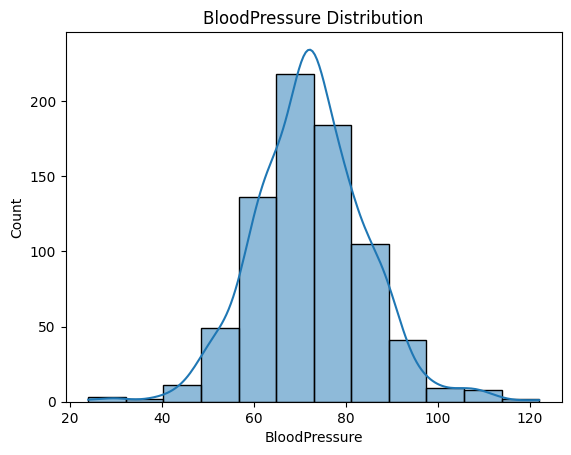

In [171]:
distribution_column('BloodPressure')

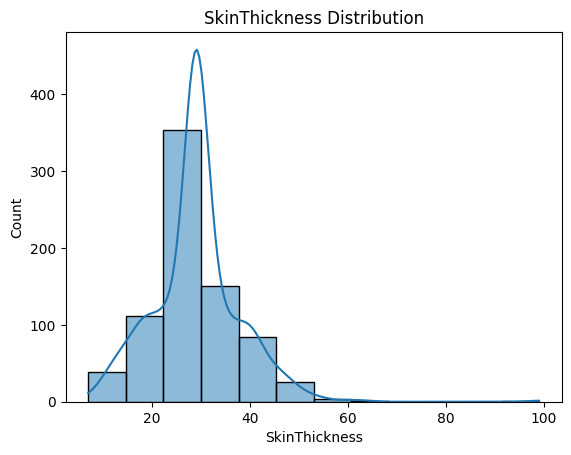

In [172]:
distribution_column('SkinThickness')

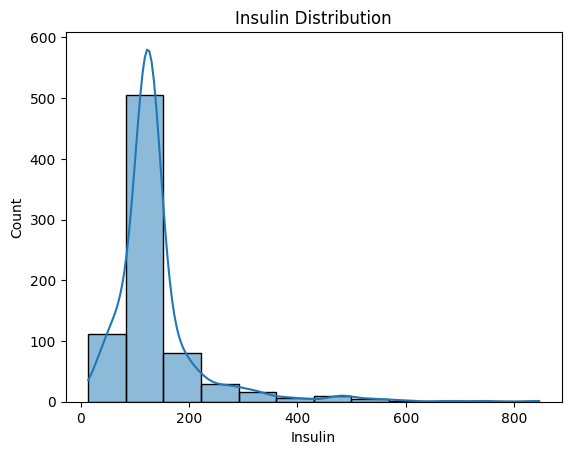

In [173]:
distribution_column('Insulin')

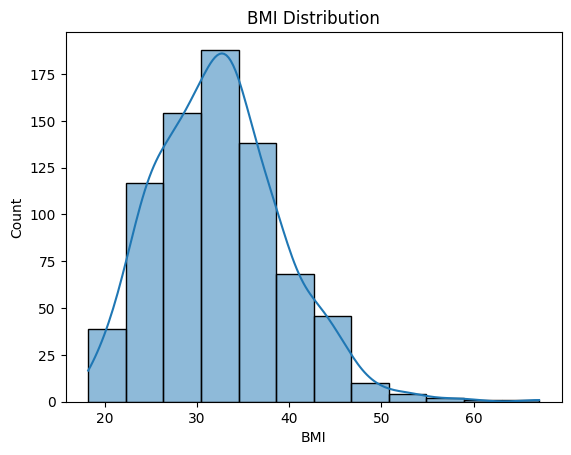

In [174]:
distribution_column('BMI')

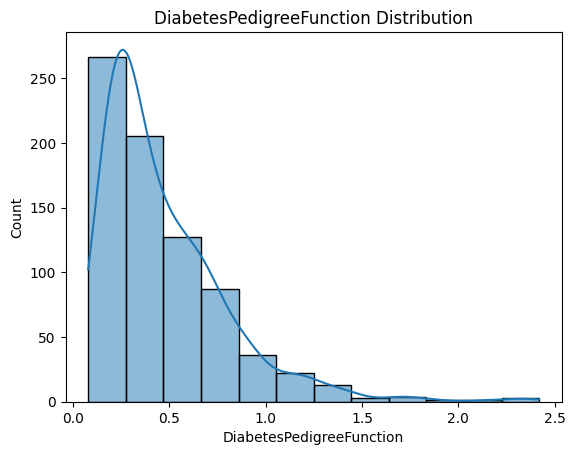

In [175]:
distribution_column('DiabetesPedigreeFunction')

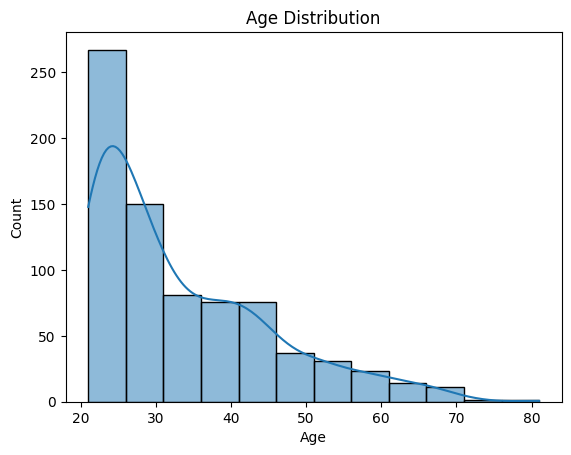

In [176]:
distribution_column('Age')

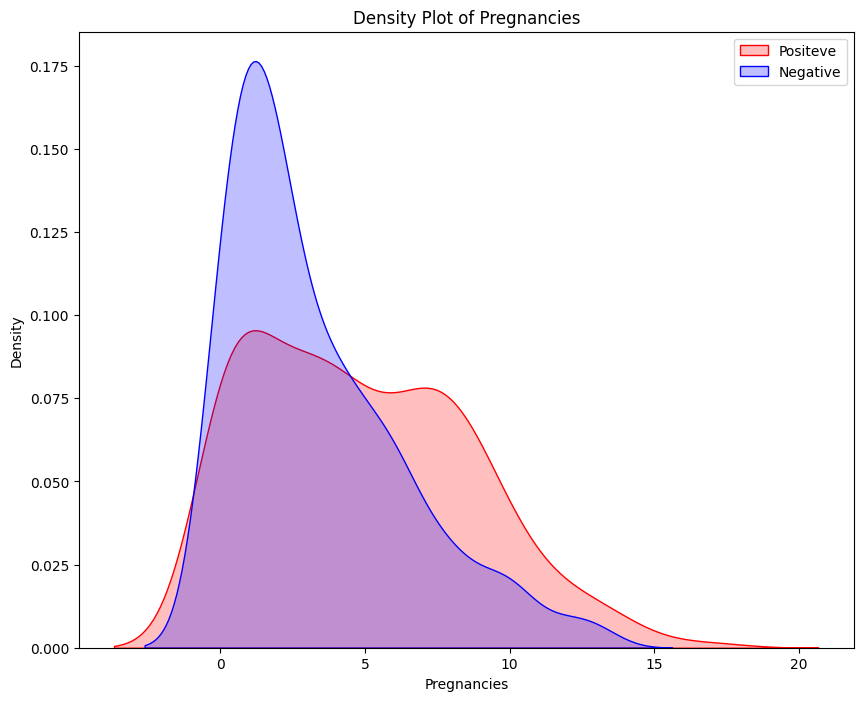

In [177]:
# Exploring Pregnancies	and target variable
plt.figure(figsize = (10 , 8))

# Density Plot
kde_plot = sns.kdeplot(df["Pregnancies"][(df["Outcome"] == 1)] , fill = True , color = "Red")
kde_plot = sns.kdeplot(df["Pregnancies"][(df["Outcome"] == 0)] , fill = True , color = "Blue")
kde_plot.set_title("Density Plot of Pregnancies")
kde_plot.set_xlabel("Pregnancies")
kde_plot.set_ylabel("Density")
kde_plot.legend(["Positeve" , "Negative"])

<Axes: >

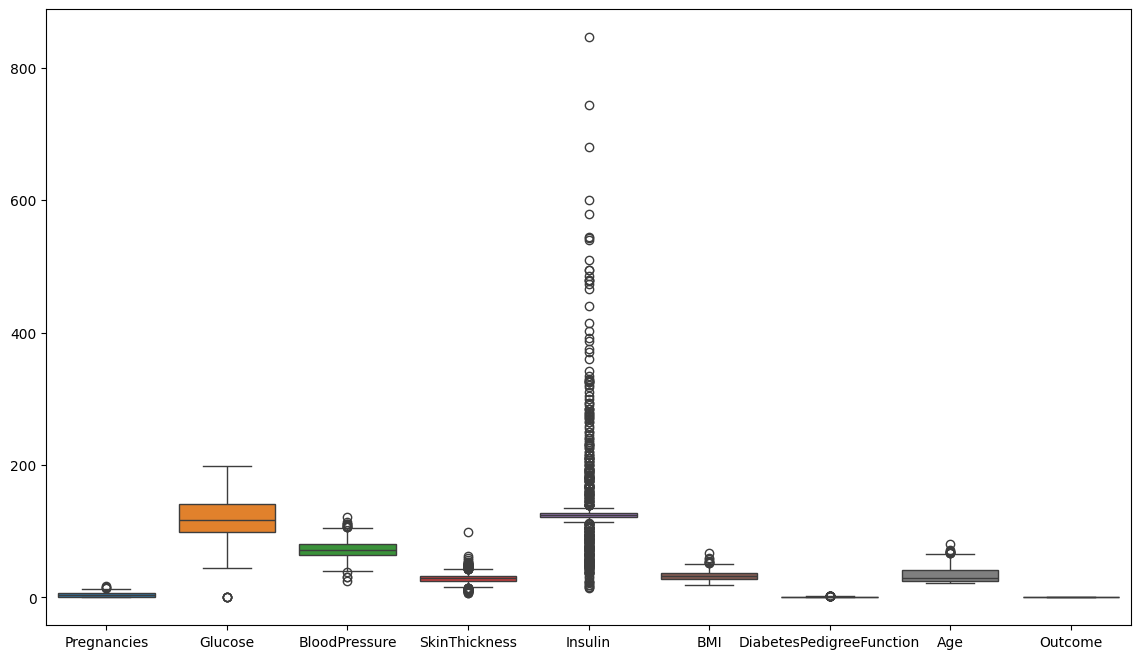

In [178]:
# Boxplot for all features
plt.figure(figsize=(14, 8))
sns.boxplot(df)

In Insulin we have more Outliers

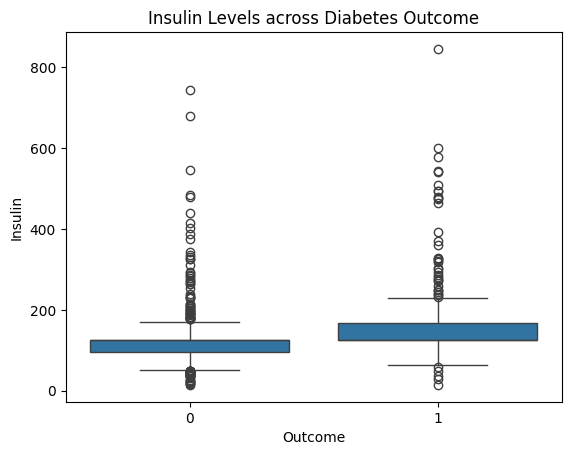

In [179]:
# Insulin Levels across Outcome
sns.boxplot(x="Outcome", y="Insulin", data=df)
plt.title("Insulin Levels across Diabetes Outcome")
plt.show()

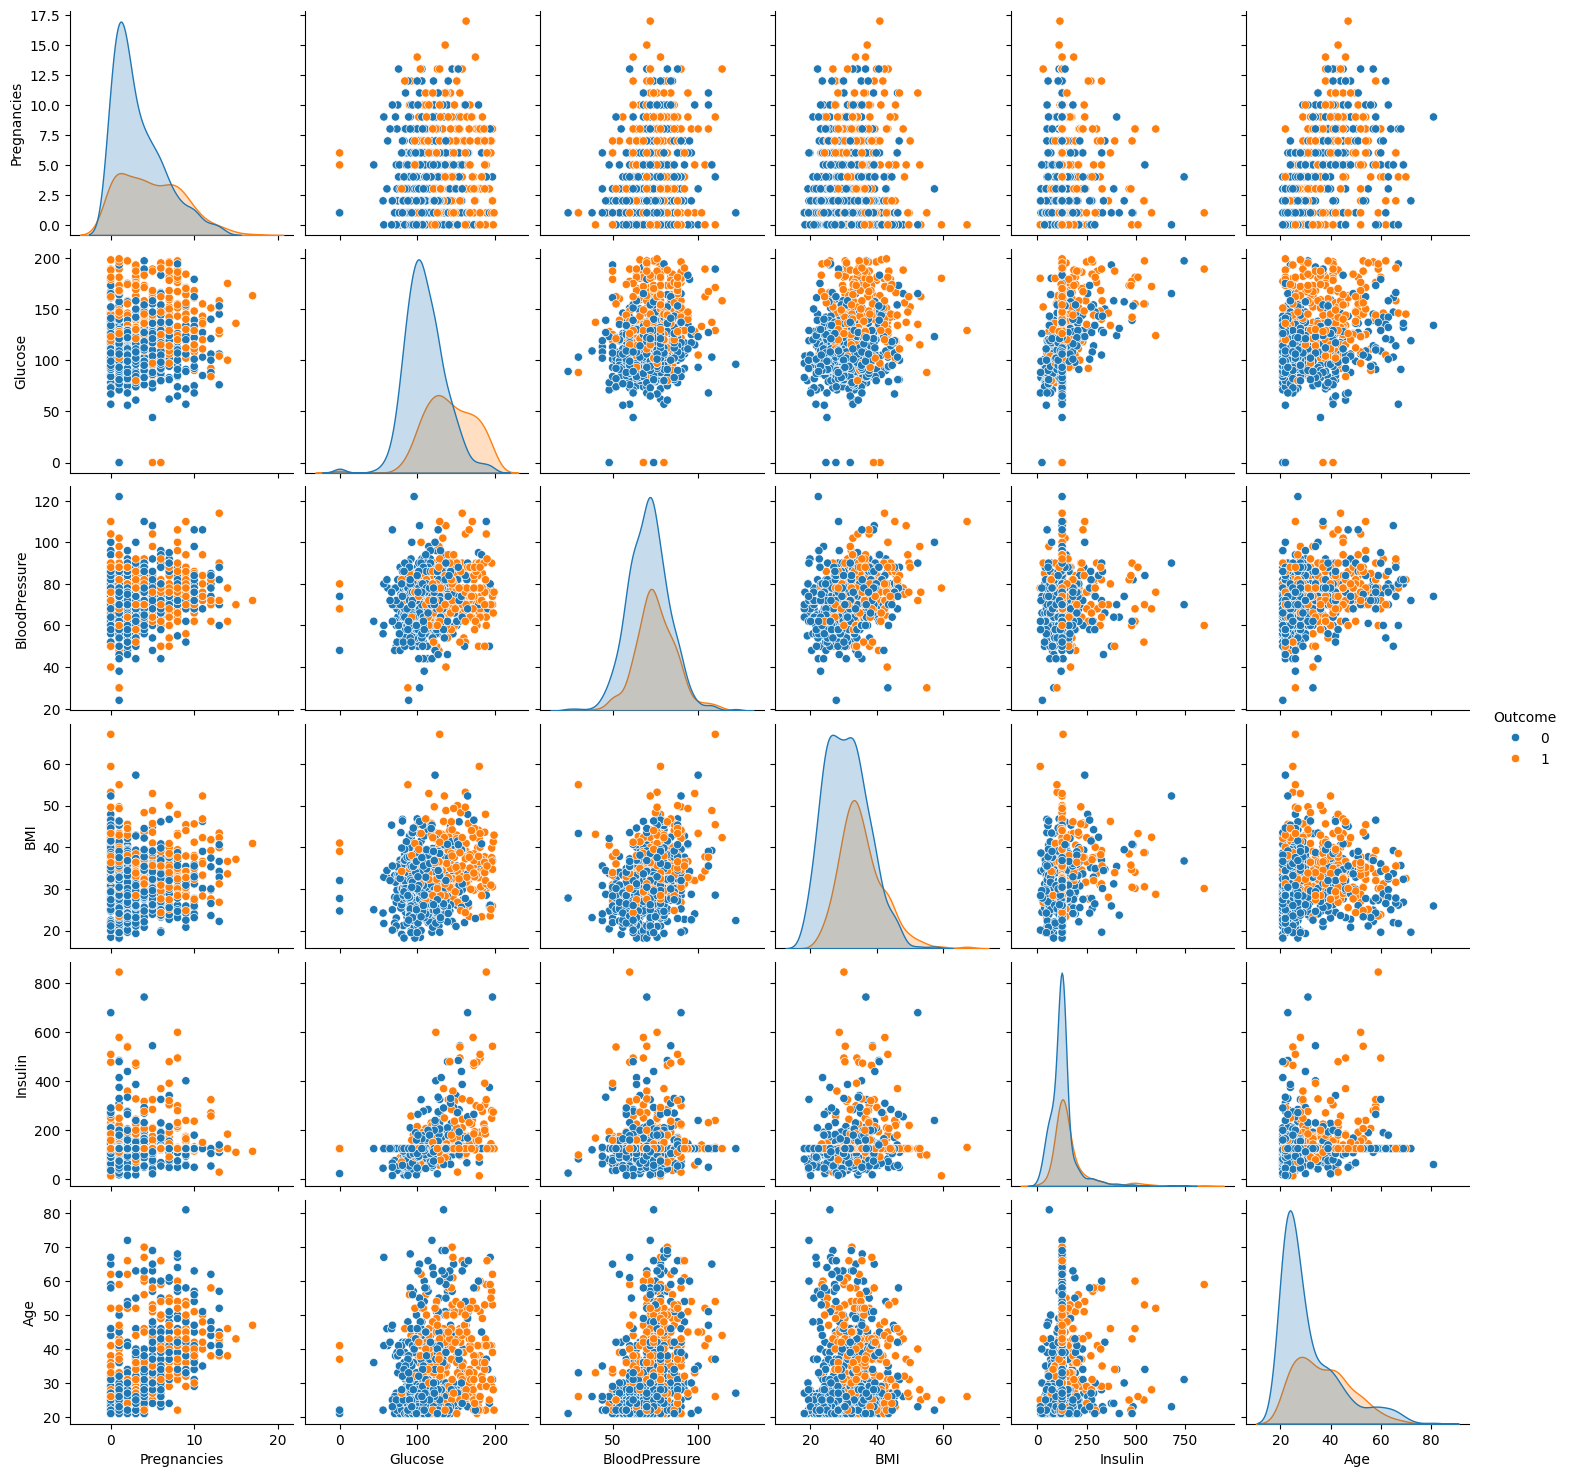

In [180]:
# Pair Plot for selected features
sns.pairplot(df[['Pregnancies','Glucose','BloodPressure','BMI','Outcome', 'Insulin', 'Age']], hue='Outcome')
plt.show()

In [181]:
# Z score use for Removing Outliers
z = np.abs(zscore(df))
dfz = df[(z<3).all(axis=1)]

In [182]:
dfz.shape

(713, 9)

Apply Z Score and Remove Outliers

# Model Traning

In [183]:
# Set Indenpendent and Dependent Features
X = dfz.iloc[:, :-1] # Input
y = dfz.iloc[:, -1] # Target

In [184]:
# check the our Input and output data shape
X.shape, y.shape

((713, 8), (713,))

In [185]:
# Data split in train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [186]:
# Check Train and Split Data shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((570, 8), (143, 8), (570,), (143,))

In [187]:
# use Logistic Regression because i have a binary outcomes data
lr = LogisticRegression()

In [188]:
# Train Data Fit in Model
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [189]:
# Prediction
y_pred = lr.predict(X_test)

In [190]:
# Model Evaluation
print("Accuracy Score", accuracy_score(y_test, y_pred))
print(" ")
print("Classification Report", classification_report(y_test, y_pred))

Accuracy Score 0.7972027972027972
 
Classification Report               precision    recall  f1-score   support

           0       0.87      0.86      0.86       106
           1       0.61      0.62      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143



# Logistic Regression with Hyper Parameter

In [191]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['saga', 'lbfgs']  # saga handles l1 + elasticnet
}

lr = LogisticRegression()
grid = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=5, )
grid.fit(X_train, y_train)

y_p = grid.predict(X_test)

print("Best Params")
print(grid.best_params_)
print("Accuracy Score")
print(accuracy_score(y_test, y_p))
print("Classification Report")
print(classification_report(y_test, y_p))

Best Params
{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy Score
0.8041958041958042
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143



In [192]:
lr = LogisticRegression(**grid.best_params_)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("Accuracy Score of Logistic Regression", accuracy_score(y_test, lr_y_pred))
print("Classification Report of Logistic Regression", classification_report(y_test, lr_y_pred))

Accuracy Score of Logistic Regression 0.8041958041958042
Classification Report of Logistic Regression               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143



In [193]:
# Check Overfitting or Underfitting
lr_train_acc = lr.score(X_train, y_train)
lr_test_acc = lr.score(X_test, y_test)

print("Training Accuracy:", lr_train_acc)
print("Testing Accuracy:", lr_test_acc)

if abs(lr_train_acc - lr_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif lr_train_acc > lr_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")

Training Accuracy: 0.7210526315789474
Testing Accuracy: 0.8041958041958042
⚠️ Possible Underfitting


In [194]:
cross_val_score(lr, X, y, scoring='accuracy', cv=5).mean()

np.float64(0.76865950950458)

# Support Vector Classification

In [195]:
params = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    # 'kernel': ['linear', 'rbf', 'poly'],
}
svc = SVC()
grid = GridSearchCV(svc, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
y_p = grid.predict(X_test)

print("Best Params", grid.best_params_)
print(accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))

Best Params {'C': 1, 'kernel': 'poly'}
0.7972027972027972
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       106
           1       0.62      0.57      0.59        37

    accuracy                           0.80       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.79      0.80      0.79       143



In [196]:
svc = SVC(**grid.best_params_)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

print("Accuracy Score of Support Vector", accuracy_score(y_test, lr_y_pred))
print("Classification Report of Support Vector", classification_report(y_test, lr_y_pred))

Accuracy Score of Support Vector 0.8041958041958042
Classification Report of Support Vector               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143



In [197]:
# Check Overfitting or Underfitting
svc_train_acc = svc.score(X_train, y_train)
svc_test_acc = svc.score(X_test, y_test)

print("Training Accuracy:", svc_train_acc)
print("Testing Accuracy:", svc_test_acc)

if abs(svc_train_acc - svc_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif svc_train_acc > svc_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")

Training Accuracy: 0.7701754385964912
Testing Accuracy: 0.7972027972027972
✅ Model is Generalizing Well (No Overfitting)


In [198]:
cross_val_score(svc, X, y, scoring='accuracy', cv=5).mean()

np.float64(0.7700384122919334)

# Random Forest Classifier

In [199]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
y_p = grid.predict(X_test)

print("Best Params", grid.best_params_)
print(accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))

Best Params {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
0.7552447552447552
              precision    recall  f1-score   support

           0       0.87      0.79      0.83       106
           1       0.52      0.65      0.58        37

    accuracy                           0.76       143
   macro avg       0.69      0.72      0.70       143
weighted avg       0.78      0.76      0.76       143



In [200]:
rfc = RandomForestClassifier(**grid.best_params_)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

print("Accuracy Score of Random Forest", accuracy_score(y_test, lr_y_pred))
print("Classification Report of Random Forest", classification_report(y_test, lr_y_pred))

Accuracy Score of Random Forest 0.8041958041958042
Classification Report of Random Forest               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143



In [201]:
# Check Overfitting or Underfitting
rfc_train_acc = rfc.score(X_train, y_train)
rfc_test_acc = rfc.score(X_test, y_test)

print("Training Accuracy:", rfc_train_acc)
print("Testing Accuracy:", rfc_test_acc)

if abs(rfc_train_acc - rfc_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif rfc_train_acc > rfc_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")

Training Accuracy: 0.9982456140350877
Testing Accuracy: 0.7552447552447552
⚠️ Possible Overfitting


In [202]:
cross_val_score(rfc, X, y, scoring='accuracy', cv=5).mean()

np.float64(0.7686398108933321)

# K Neighbors

In [203]:
params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
y_p = grid.predict(X_test)

print("Best Params", grid.best_params_)
print(accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))

knn = KNeighborsClassifier(**grid.best_params_)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

print("Accuracy Score of KNN", accuracy_score(y_test, lr_y_pred))
print("Classification Report of KNN", classification_report(y_test, lr_y_pred))

# Check Overfitting or Underfitting
knn_train_acc = knn.score(X_train, y_train)
knn_test_acc = knn.score(X_test, y_test)

print("Training Accuracy:", knn_train_acc)
print("Testing Accuracy:", knn_test_acc)

if abs(knn_train_acc - knn_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif knn_train_acc > knn_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")
    
print(cross_val_score(knn, X, y, scoring='accuracy', cv=5).mean())

Best Params {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.7272727272727273
              precision    recall  f1-score   support

           0       0.88      0.74      0.80       106
           1       0.48      0.70      0.57        37

    accuracy                           0.73       143
   macro avg       0.68      0.72      0.69       143
weighted avg       0.77      0.73      0.74       143

Accuracy Score of KNN 0.8041958041958042
Classification Report of KNN               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Training Accuracy: 0.7614035087719299
Testing Accuracy: 0.7272727272727273
✅ Model is Generalizing Well (No Overfitting)
0.7363833349748843


# Decision Tree

In [204]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dtc = DecisionTreeClassifier()
grid = GridSearchCV(dtc, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
y_p = grid.predict(X_test)

print("Best Params", grid.best_params_)
print(accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))

dtc = DecisionTreeClassifier(**grid.best_params_)
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_test)

print("Accuracy Score of Decision Tree", accuracy_score(y_test, lr_y_pred))
print("Classification Report of Decision Tree", classification_report(y_test, lr_y_pred))

# Check Overfitting or Underfitting
dtc_train_acc = dtc.score(X_train, y_train)
dtc_test_acc = dtc.score(X_test, y_test)

print("Training Accuracy:", dtc_train_acc)
print("Testing Accuracy:", dtc_test_acc)

if abs(dtc_train_acc - dtc_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif dtc_train_acc > dtc_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")
    
print(cross_val_score(dtc, X, y, scoring='accuracy', cv=5).mean())

Best Params {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
0.7342657342657343
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       106
           1       0.49      0.65      0.56        37

    accuracy                           0.73       143
   macro avg       0.68      0.71      0.68       143
weighted avg       0.77      0.73      0.74       143

Accuracy Score of Decision Tree 0.8041958041958042
Classification Report of Decision Tree               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Training Accuracy: 0.9210526315789473
Testing Accuracy: 0.7342657342657343
⚠️ Possible Overfitting
0.697074756229686


# XGBClassifier

In [205]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid = GridSearchCV(xgb, param_grid=params, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)
y_p = grid.predict(X_test)

print("Best Params", grid.best_params_)
print(accuracy_score(y_test, y_p))
print(classification_report(y_test, y_p))

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **grid.best_params_)
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

print("Accuracy Score of XG Boost", accuracy_score(y_test, lr_y_pred))
print("Classification Report of XG Boost", classification_report(y_test, lr_y_pred))

# Check Overfitting or Underfitting
xgb_train_acc = xgb.score(X_train, y_train)
xgb_test_acc = xgb.score(X_test, y_test)

print("Training Accuracy:", xgb_train_acc)
print("Testing Accuracy:", xgb_test_acc)

if abs(xgb_train_acc - xgb_test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif xgb_train_acc > xgb_test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")
    
print(cross_val_score(xgb, X, y, scoring='accuracy', cv=5).mean())

Best Params {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
0.8041958041958042
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Accuracy Score of XG Boost 0.8041958041958042
Classification Report of XG Boost               precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Training Accuracy: 0.856140350877193
Testing Accuracy: 0.8041958041958042
⚠️ Possible Overfitting
0.7518270461932434


# Voting Classifier

In [206]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC()
clf3 = KNeighborsClassifier()
vf = [('lr', clf1), ('svc', clf2), ('knn', clf3)]

In [207]:
# score = cross_val_score(vf, X, y, cv=5, scoring='accuracy')

In [208]:
vc= VotingClassifier(vf)
vc.fit(X_train, y_train)
pred = vc.predict(X_test)

print("Accuracy Score ",accuracy_score(y_test, pred))
print("Classification Report ", classification_report(y_test, pred))

train_acc = vc.score(X_train, y_train)
test_acc = vc.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

if abs(train_acc - test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif train_acc > test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")

Accuracy Score  0.7902097902097902
Classification Report                precision    recall  f1-score   support

           0       0.86      0.86      0.86       106
           1       0.59      0.59      0.59        37

    accuracy                           0.79       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.79      0.79      0.79       143

Training Accuracy: 0.7789473684210526
Testing Accuracy: 0.7902097902097902
✅ Model is Generalizing Well (No Overfitting)


# StackingClassifier

In [209]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC()
clf3 = GaussianNB()
vf = [('lr', clf1), ('svc', clf2), ('gnb', clf3)]

In [210]:
# sc= StackingClassifier(vf, final_estimator=DecisionTreeClassifier())
sc= StackingClassifier(vf, final_estimator=VotingClassifier(vf))
sc.fit(X_train, y_train)
pred = sc.predict(X_test)

print("Accuracy Score ",accuracy_score(y_test, pred))
print("Classification Report ", classification_report(y_test, pred))

train_acc = sc.score(X_train, y_train)
test_acc = sc.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

if abs(train_acc - test_acc) < 0.05:
    print("✅ Model is Generalizing Well (No Overfitting)")
elif train_acc > test_acc:
    print("⚠️ Possible Overfitting")
else:
    print("⚠️ Possible Underfitting")

Accuracy Score  0.8041958041958042
Classification Report                precision    recall  f1-score   support

           0       0.86      0.88      0.87       106
           1       0.63      0.59      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Training Accuracy: 0.7649122807017544
Testing Accuracy: 0.8041958041958042
✅ Model is Generalizing Well (No Overfitting)


In [211]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()
vf = [('lr', clf1), ('rf', clf2), ('gnb', clf3)]

In [212]:
models = {'lr': LogisticRegression(), 'svm': SVC(), 'rfc': RandomForestClassifier(), 'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier(), 'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 'vc': VotingClassifier(vf), 'sc': StackingClassifier(vf)}

In [213]:
for key, model in models.items():
    print(model)
    score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    print("Accuracy Score ",accuracy_score(y_test, pred))
    print("Classification Report ", classification_report(y_test, pred))

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    print("Training Accuracy:", train_acc)
    print("Testing Accuracy:", test_acc)

    if abs(train_acc - test_acc) < 0.05:
        print("✅ Model is Generalizing Well (No Overfitting)")
    elif train_acc > test_acc:
        print("⚠️ Possible Overfitting")
    else:
        print("⚠️ Possible Underfitting")


    print(" ")
    print("=========================")
    print(" ")

LogisticRegression()
Accuracy Score  0.7972027972027972
Classification Report                precision    recall  f1-score   support

           0       0.87      0.86      0.86       106
           1       0.61      0.62      0.61        37

    accuracy                           0.80       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.80      0.80      0.80       143

Training Accuracy: 0.7666666666666667
Testing Accuracy: 0.7972027972027972
✅ Model is Generalizing Well (No Overfitting)
 
 
SVC()
Accuracy Score  0.7832167832167832
Classification Report                precision    recall  f1-score   support

           0       0.85      0.86      0.85       106
           1       0.58      0.57      0.58        37

    accuracy                           0.78       143
   macro avg       0.72      0.71      0.71       143
weighted avg       0.78      0.78      0.78       143

Training Accuracy: 0.7508771929824561
Testing Accuracy: 0.7832167832167832
✅ M

In [214]:
def predict_single(patient_data):
    patient_data = patient_data.reshape(1,-1)

    pred = model.predict(patient_data)
    
    print("Input:", patient_data)
    print("Value of p:", pred)
    if pred == 0:
        print("Diabetes Not Detected")
    else:
        print("Diabetes Detected")

In [215]:
patient_data = np.array([9,106,52.0,29.0,125.0,31.2,0.38,42])
predict_single(patient_data)

Input: [[  9.   106.    52.    29.   125.    31.2    0.38  42.  ]]
Value of p: [0]
Diabetes Not Detected


In [216]:
def predict_multiple(patients_data):
    patients_data = np.array(patients_data)   # shape = (n_samples, n_features)
    preds = model.predict(patients_data)

    for i, pred in enumerate(preds):
        print(f"Patient {i+1} →", "Diabetes Detected" if pred == 1 else "Diabetes Not Detected")

In [217]:
# Example (multiple patients)
patients = [
    [9,106,52.0,29.0,125.0,31.2,0.38,42],   # Patient 1
    [2,120,70,30,0,35.0,0.5,25],            # Patient 2
    [5,150,80,33,140,40.0,0.6,50]           # Patient 3
]
predict_multiple(patients)

Patient 1 → Diabetes Not Detected
Patient 2 → Diabetes Not Detected
Patient 3 → Diabetes Detected


In [218]:
dfz.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
487,0,173,78.0,32.0,265.0,46.5,1.159,58,0


# 📌 Summary

- **Dataset:** Diabetes dataset with 768 records and 9 features.  

### 🔧 Preprocessing:
- Fixed shifted column names.  
- Replaced impossible insulin values (0) with median.  
- Removed outliers using Z-Score.  
- No missing or duplicate values.  

### 📊 EDA:
- Pregnancies, Insulin, BMI, and Family History (DPF) are most correlated with diabetes.  
- No serious multicollinearity issue (all correlations < 0.7).  
- Insulin values had heavy outliers.  

### 🤖 Modeling:
- Logistic Regression (without hyperparameter tuning) → **80% accuracy**.  
  - Better precision for class `0` (non-diabetic) than class `1` (diabetic).  
- Voting Classifier (LogisticRegression, SVC, KNN) → **80% accuracy**.  
- Stacking Classifier (LogisticRegression, SVC, GaussianNB) → **80% accuracy**.  

### ⚖️ Overfitting / Underfitting:
- Training accuracy ≈ Testing accuracy → no overfitting.  
- If train ≫ test → overfitting.  
- If both low → underfitting.  

---

# 📝 Conclusion

### 📌 Dataset Preparation:
- Loaded dataset, fixed incorrect column names.  
- No missing/null values.  
- Found invalid values (0) in medical features like Blood Pressure, Skin Thickness, Insulin, BMI.  
- Replaced 0 values with **median** (robust for skewed medical data).  

### 📌 EDA Insights:
- Pregnancies, Insulin, BMI, and Family History strongly linked with diabetes.  
- Visualizations (pair plots, scatter plots, box plots, bar plots) highlighted outliers.  
- Insulin had many outliers → removed using Z-Score.  

### 📌 Modeling & Results:
- **Without Hyperparameter Tuning:**  
  - Logistic Regression → 79%  
  - SVC → 78%  
  - Random Forest → 77% (overfitting)  
  - KNN → 75%  
  - Decision Tree → 73% (overfitting)  
  - XGBoost → 75% (overfitting)  
  - Voting Classifier → 79%  
  - Stacking Classifier → 79%  

- **With Hyperparameter Tuning:**  
  - Logistic Regression, SVC, and KNN improved to ~80%.  
  - Decision Tree improved and reduced overfitting.  
  - Voting and Stacking Classifiers stabilized at ~80%.  
  - XGBoost still showed overfitting.  

### 📌 Final Insights:
- Logistic Regression, SVC, and KNN → best performers (79–80%).  
- Ensemble methods (Voting/Stacking) gave stable results around 80%.  
- Random Forest, Decision Tree, and XGBoost tended to overfit.  
- To improve beyond 80%, more **feature engineering** (One-Hot Encoding, StandardScaler, handling outliers more carefully, or splitting data category-wise) is needed.  

👉 In short: **Logistic Regression, SVC, and KNN** generalized well and are reliable baselines. Ensemble models provided stable accuracy, while overfitting models can be tuned further.  


In [219]:
# models = {'lr': LogisticRegression(), 'svm': SVC(), 'rfc': RandomForestClassifier(), 'knn': KNeighborsClassifier(), 'dt': DecisionTreeClassifier(), 'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')}

# param_grid = {
#     'lr': {
#         'penalty': ['l1', 'l2', 'elasticnet', None],
#         'C': [0.01, 0.1, 1, 10],
#         'solver': ['saga', 'lbfgs']  # saga handles l1 + elasticnet        
#     },
#     'svm': {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf', 'poly'],
#         'gamma': ['scale', 'auto']
#     },
#     'rfc': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     },
#     'knn': {
#         'n_neighbors': [3, 5, 7, 9],
#         'weights': ['uniform', 'distance'],
#         'metric': ['euclidean', 'manhattan']
#     },
#     'dt': {
#         'criterion': ['gini', 'entropy', 'log_loss'],
#         'max_depth': [None, 5, 10, 20],
#         'min_samples_split': [2, 5, 10]        
#     },
#     'xgb': {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [3, 5, 7],
#         'learning_rate': [0.01, 0.1, 0.2],
#         'subsample': [0.8, 1.0]        
#     }
#  }

In [220]:
# best_models = {}

# for key, model in models.items():
#     if key in param_grid:  # only run GridSearch if params exist
#         print(f"\n🔍 Tuning {key.upper()} ...")
#         grid = GridSearchCV(model, param_grid[key], cv=5, scoring='accuracy', n_jobs=-1)
#         grid.fit(X_train, y_train)

#         print("Best Params:", grid.best_params_)
#         print("Best CV Score:", grid.best_score_)

#         # Save best model
#         best_models[key] = grid.best_estimator_

#         # Test on X_test
#         pred = grid.predict(X_test)
#         print("Accuracy Score:", accuracy_score(y_test, pred))
#         print("Classification Report:\n", classification_report(y_test, pred))
#         print("===============================")